In [1]:
#Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [60]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("titanic_train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("titanic_test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [62]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


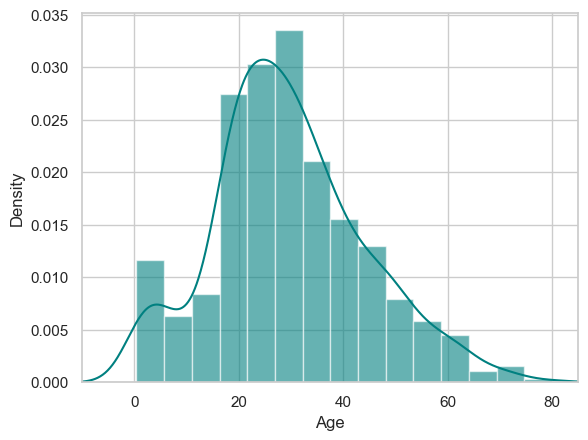

In [65]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6) #This line creates a histogram of the "Age" column in the train_df DataFrame.
train_df["Age"].plot(kind='density', color='teal') #This line generates a kernel density estimation plot for the "Age" column in the train_df DataFrame.
ax.set(xlabel='Age')
plt.xlim(-10,85) # This sets the limits for the x-axis of the plot, restricting it from -10 
plt.show()

In [66]:
# bins=15 specifies the number of bins in the histogram.
# density=True normalizes the histogram to represent the probability density.
# stacked=True stacks the bars of the histogram on top of each other.
# color='teal' sets the color of the bars in the histogram to teal.
# alpha=0.6 sets the transparency level of the bars in the histogram.

# kind='density' specifies the type of plot as a density plot.
# color='teal' sets the color of the density curve to teal.

In [67]:
#mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))

#median age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))

The mean of "Age" is 29.70
The mean of "Age" is 29.70


In [68]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


This line of code calculates and prints the percentage of missing records in the "Cabin" column of the train_df DataFrame.

1) (train_df['Cabin'].isnull().sum(): This expression counts the number of missing values in the "Cabin" column. train_df['Cabin'].isnull() returns a boolean Series where True indicates missing values.

2) .sum() sums up the True values, as in Python True is considered as 1 and False as 0.

3) train_df.shape[0] returns the total number of rows in the DataFrame.

4) (train_df['Cabin'].isnull().sum()/train_df.shape[0])*100 calculates the percentage of missing values in the "Cabin" column by dividing the count of missing values by the total number of rows and multiplying by 100.

5) "Percent of missing "Cabin" records is %.2f%%' % formats the resulting percentage value into a string with two decimal places.

Finally, print() is used to display the formatted string on the output console.

In [69]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):)
S    644
C    168
Q     77
Name: Embarked, dtype: int64


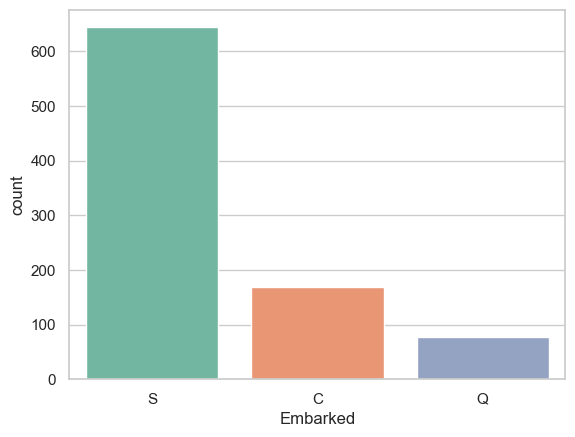

In [71]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):)')
print(train_df['Embarked'].value_counts()) # This line prints the count of each unique value in the "Embarked" column. It shows the number of occurrences of each value.
sns.countplot(x = 'Embarked', data=train_df, palette='Set2') # This line creates a countplot using seaborn (sns). It visualizes the distribution of values in the "Embarked" column.
plt.show()

1) x='Embarked' specifies that the "Embarked" column should be plotted on the x-axis.
2) data=train_df specifies the DataFrame from which the data should be taken.
3) palette='Set2' sets the color palette for the plot.

In [72]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [73]:
# If "Age" is missing for a given row impute with 28 (median age).
# If "Embarked" is missing for a riven row impute with "S" (the most common boarding port).
# ignore "Cabin" as a variable

In [75]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [76]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


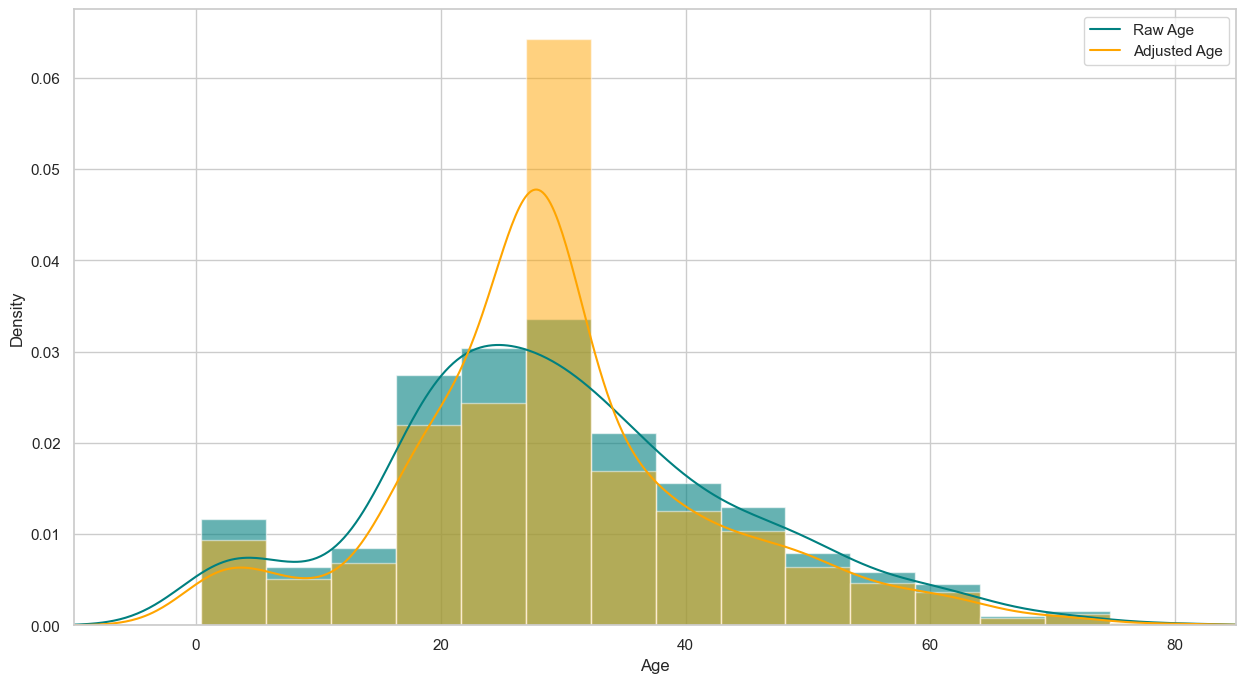

In [79]:
plt.figure(figsize=(15,8))

ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')

ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')

plt.xlim(-10,85)
plt.show()

In [19]:
# According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake 
# (and to account for possible multicollinearity) combine the effect of these variables into one categorical predictor: whether 
# or not that individual was traveling alone.

In [80]:
train_data['TravelAlone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

1) train_data['TravelAlone'] = np.where((train_data["SibSp"]+train_data["Parch"]) > 0, 0, 1): This line creates a new column called "TravelAlone" in the train_data DataFrame using the np.where() function.
-----------------

2) (train_data["SibSp"] + train_data["Parch"]) calculates the sum of the "SibSp" and "Parch" columns, representing the total number of siblings/spouses and parents/children a passenger has.
-------

3) (train_data["SibSp"] + train_data["Parch"]) > 0 checks if the sum is greater than 0, indicating that the passenger is not traveling alone.
-----

4) **np.where(condition, value_if_true, value_if_false)** assigns the value 0 if the condition is true (passenger is not traveling alone) and 1 if the condition is false (passenger is traveling alone).

In [21]:
training=pd.get_dummies(train_data, columns=["Pclass", "Embarked", "Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


1) training = pd.get_dummies(train_data, columns=["Pclass", "Embarked", "Sex"]): This line uses the pd.get_dummies() function to perform one-hot encoding on the specified columns.
----
3) train_data is the DataFrame on which the encoding is applied.
---
4) columns=["Pclass", "Embarked", "Sex"] specifies the columns to be one-hot encoded.

In [22]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass", "Embarked", "Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# EDA

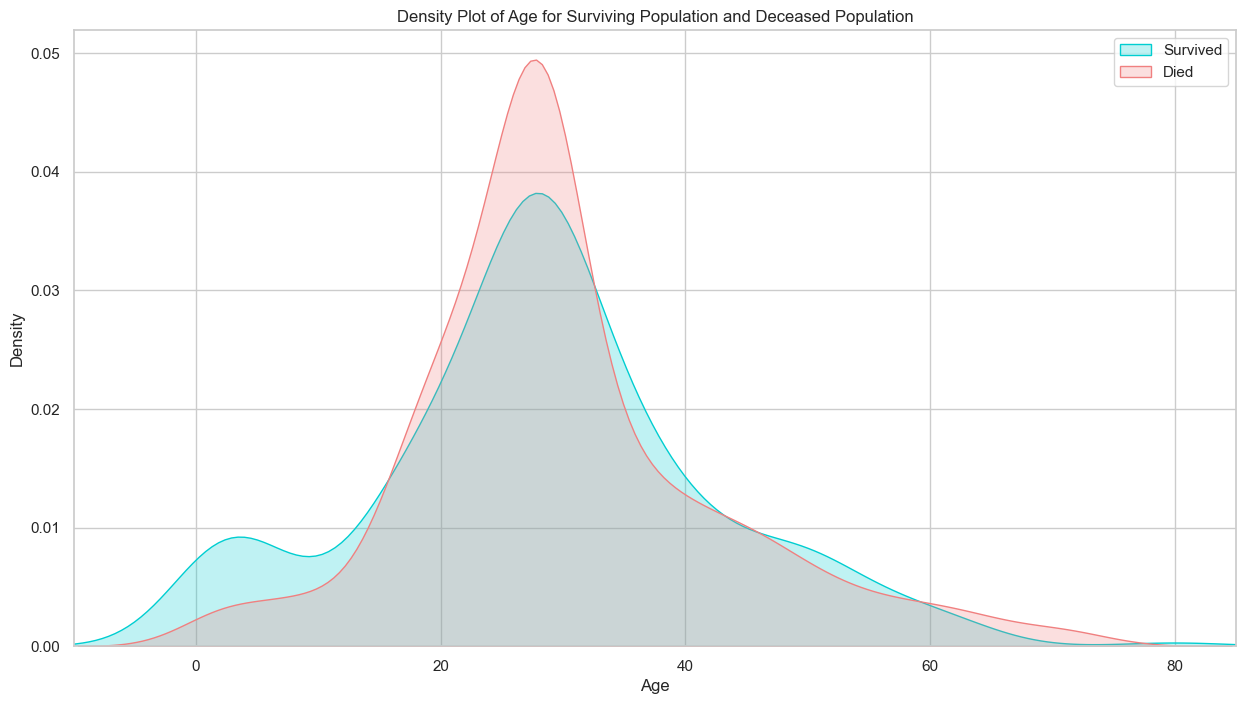

In [24]:
plt.figure(figsize=(15, 8))

ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)

sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

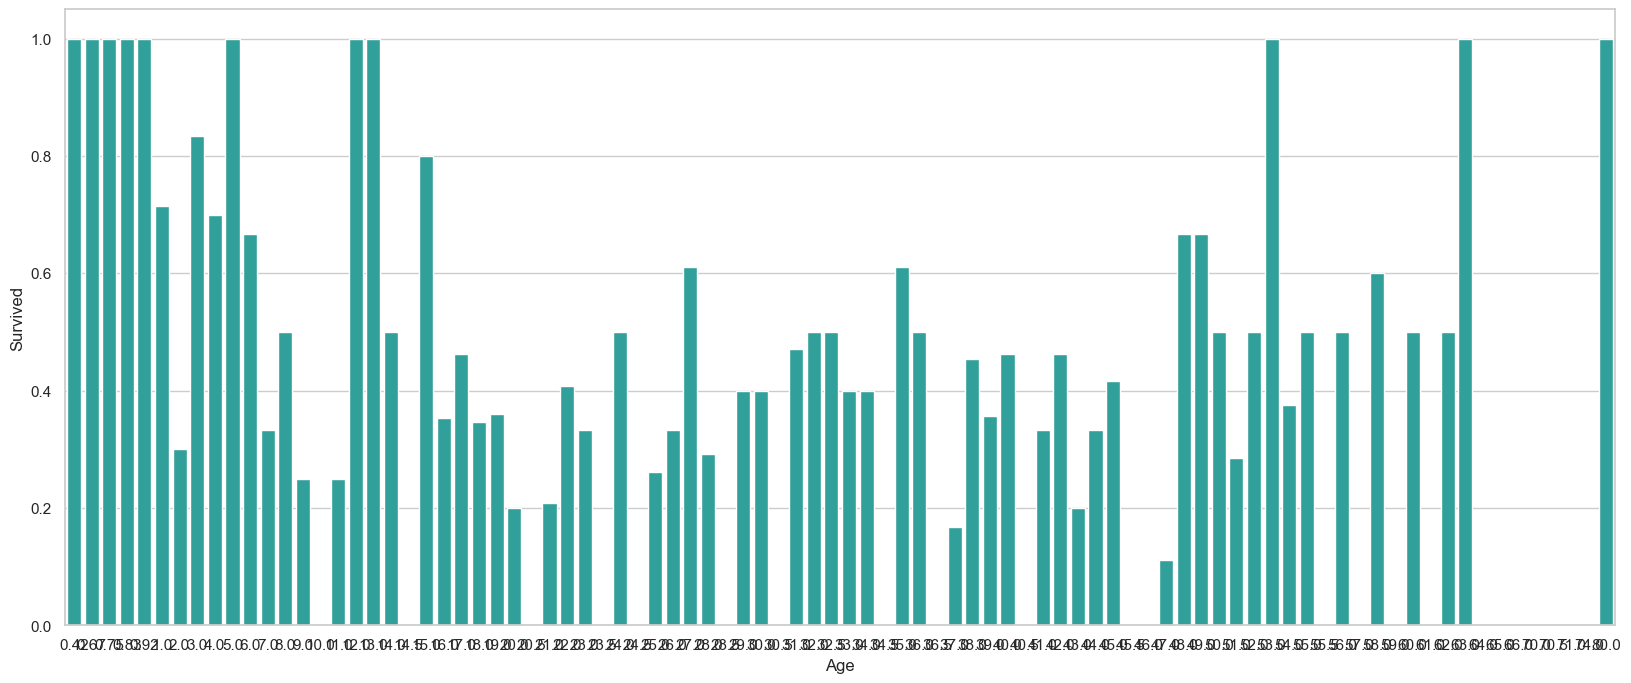

In [25]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index = False).mean()
g = sns.barplot(x='Age', y='Survived', data = avg_survival_byage, color="LightSeaGreen")
plt.show()

1) final_train[["Age", "Survived"]]: This selects the "Age" and "Survived" columns from the final_train DataFrame.
---
2) .groupby(['Age'], as_index=False): This groups the selected columns by the unique values in the "Age" column.
---
3) as_index=False ensures that the "Age" column is not set as the index of the resulting DataFrame.
---
4) .mean(): This calculates the mean (average) value for each age group in the grouped DataFrame.
---
5) This operation computes the average survival rate for each age group.
---
6) The result is a new DataFrame called avg_survival_byage that contains the average survival rate for each age group.





In [26]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

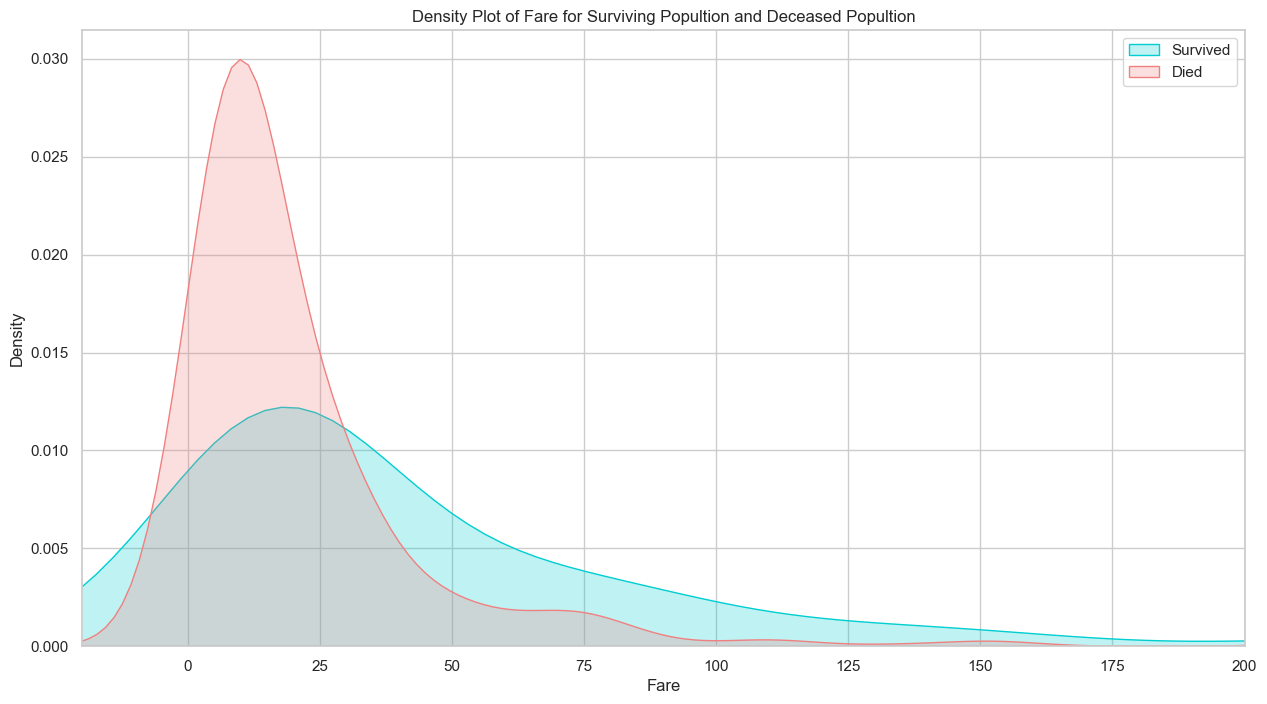

In [27]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)

sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)

plt.legend(['Survived', 'Died'])

plt.title('Density Plot of Fare for Surviving Popultion and Deceased Popultion')

ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

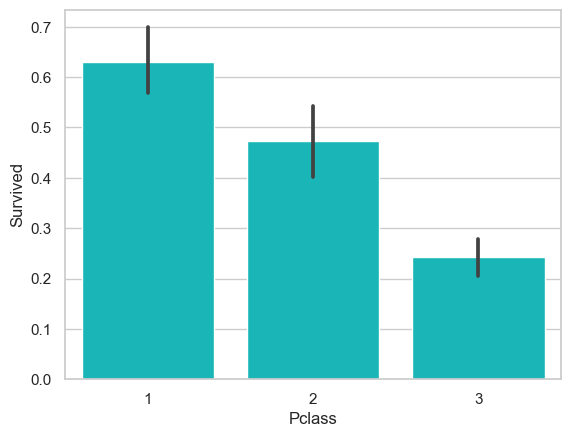

In [28]:
sns.barplot(x = 'Pclass', y = 'Survived', data=train_df, color="darkturquoise")
plt.show()

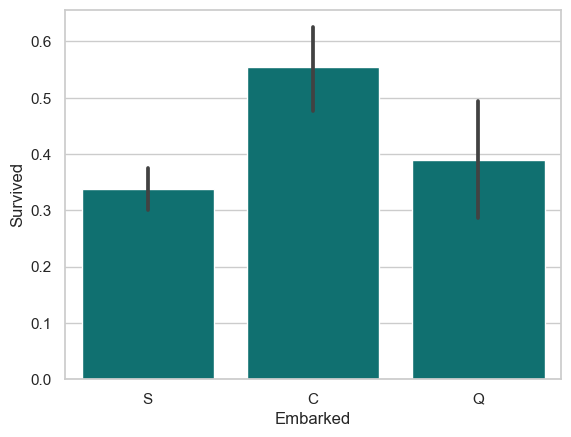

In [29]:
sns.barplot(x = 'Embarked', y = 'Survived', data=train_df, color="teal")
plt.show()

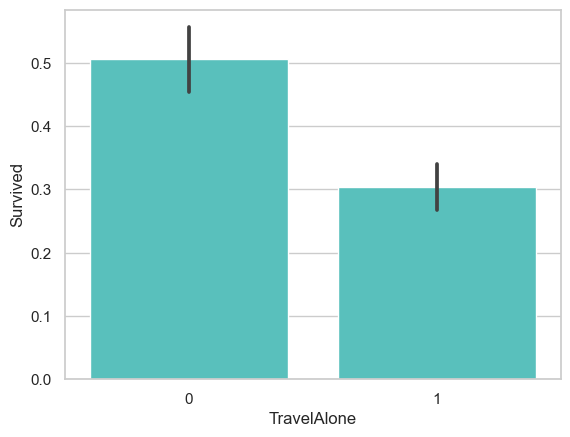

In [30]:
sns.barplot(x= 'TravelAlone', y = 'Survived', data=final_train, color="mediumturquoise")
plt.show()

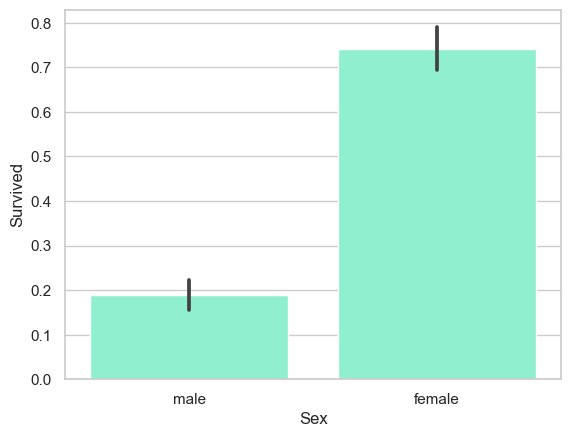

In [31]:
sns.barplot(x = 'Sex', y = 'Survived', data=train_df, color="aquamarine")
plt.show()

In [32]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']

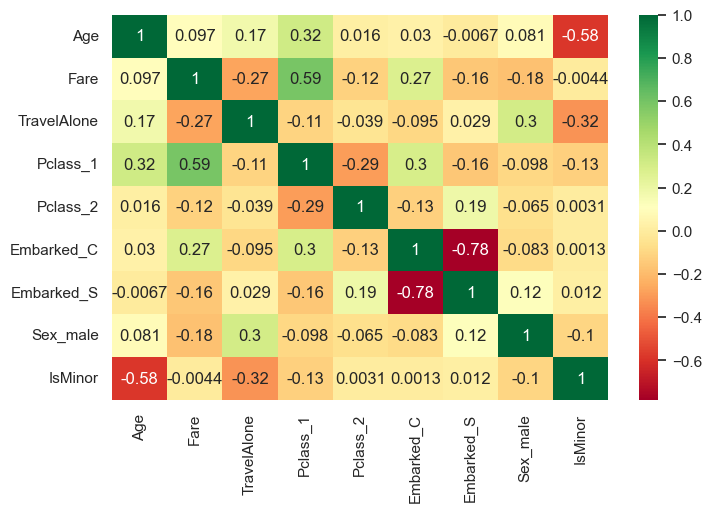

In [33]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

In [36]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [37]:
def cost_function(X, Y, theta):
    h_theta = hypothesis(X, theta)
    cost = np.mean(Y*np.log(h_theta) + (1-Y)*np.log(1-h_theta))
    cost = cost * -1
    
    return cost

In [38]:
def gradient(X, Y, theta):
    h_theta = hypothesis(X, theta)
    
    grad = np.dot(X.T, (Y - h_theta))
    
    return grad/X.shape[0]

In [39]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []
    
    for i in range(max_steps):
        
        grad = gradient(X, Y, theta)
        
        e = cost_function(X, Y, theta)
        cost_epoch.append(e)
        
        theta = theta + learning_rate * grad
        
    return (theta, cost_epoch)

In [40]:
X_train, X_test, y_train, y_test

(      Age      Fare  TravelAlone  Pclass_1  Pclass_2  Embarked_C  Embarked_S  \
 30   40.0   27.7208            1         1         0           1           0   
 10    4.0   16.7000            0         0         0           0           1   
 873  47.0    9.0000            1         0         0           0           1   
 182   9.0   31.3875            0         0         0           0           1   
 876  20.0    9.8458            1         0         0           0           1   
 ..    ...       ...          ...       ...       ...         ...         ...   
 534  30.0    8.6625            1         0         0           0           1   
 584  28.0    8.7125            1         0         0           1           0   
 493  71.0   49.5042            1         1         0           1           0   
 527  28.0  221.7792            1         1         0           0           1   
 168  28.0   25.9250            1         1         0           0           1   
 
      Sex_male  IsMinor  


In [41]:
y_train = np.array(y_train)
print(y_train.shape)

(712,)


In [42]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
y_train = y_train.reshape((-1, 1))

[[ 1.     40.     27.7208  1.    ]
 [ 1.      4.     16.7     0.    ]
 [ 1.     47.      9.      1.    ]
 [ 1.      9.     31.3875  0.    ]] (712, 10)


In [43]:
theta, cost_epoch = gradient_descent(X_train, y_train, learning_rate=0.001, max_steps = 1000000)

In [44]:
theta

array([[ 1.16021957e+00],
       [-2.84339014e-02],
       [ 8.09940120e-04],
       [ 8.32330234e-02],
       [ 2.32187466e+00],
       [ 1.43560957e+00],
       [-4.41659487e-02],
       [-5.27739129e-01],
       [-2.68543509e+00],
       [ 6.25407333e-01]])

In [45]:
cost_epoch[-10:]

[0.43312148059030825,
 0.43312148056643346,
 0.4331214805425588,
 0.43312148051868404,
 0.43312148049480975,
 0.4331214804709354,
 0.43312148044706134,
 0.43312148042318743,
 0.43312148039931364,
 0.43312148037544007]

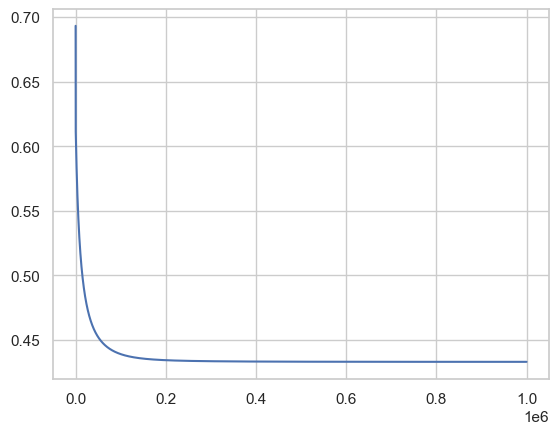

In [46]:
plt.plot(cost_epoch)

In [47]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
y_test = np.array(y_test)
y_test = y_test.reshape((-1, 1))

[[ 1.     42.     26.2875  1.    ]
 [ 1.     21.      8.05    1.    ]
 [ 1.     24.     65.      0.    ]
 [ 1.     28.     56.4958  1.    ]] (179, 10)


In [48]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)
    
    output[h_theta>0.5] = 1
    output = output.astype('int')
    
    return output

In [49]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

In [50]:
for i in range(len(test_preds)):
    print(test_preds[i], y_test[i])

[0] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [1]
[0] [1]
[1] [1]
[0] [1]
[0] [0]
[1] [0]
[0] [0]
[1] [0]
[1] [1]
[0] [0]
[1] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [0]
[0] [0]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [0]
[1] [1]
[0] [0]
[0] [1]
[1] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[1] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [1]
[0] [0]
[0] [0]
[1] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [1]
[1] [1]
[0] [1]
[0] [1]
[1] [1]
[0] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[1] [1]
[1] [0]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [1]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [1]
[1] [1]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]


In [51]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [58]:
accuracy(test_preds, y_test)

0.7821229050279329


In [53]:
accuracy(train_preds, y_train)

0.8132022471910112


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
model.score(X_test, y_test)

0.776536312849162